# Predicting the Popularity of Music Records
# Student: Majid Lagzian

## 1.	Fit a logistic regression model using all variables

In [1]:
#First we import the required libraries
#Also, we import our data from the appropriate file
import pandas as pd
import os.path as osp
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

data_path = osp.join(osp.curdir,'MusicData.csv')
music_data = pd.read_csv(data_path, encoding='latin-1')
music_data.head()

,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
0,2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,...,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
1,2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,...,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2,2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,...,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
3,2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,...,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
4,2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,...,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0


In [2]:
# Now we conduct a quick data exploration to see if there is any missing value, outlier, etc.
music_data.describe()

,year,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
count,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,...,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000
mean,2001.455902,3.893979,0.853307,-8.817262,107.348267,0.622866,5.384605,0.433843,0.675471,0.010817,...,95.653221,-63.703984,50.057489,-59.515016,68.028067,-87.340055,55.520722,-50.868457,47.490774,0.147742
std,5.815223,0.532561,0.243748,4.377079,24.665030,0.304656,3.572579,0.273826,0.243473,0.013671,...,26.859726,15.970244,14.463524,17.190527,20.381321,30.464274,23.549473,11.701530,12.463966,0.354868
min,1990.000000,0.000000,0.000000,-42.451000,0.000000,0.000000,0.000000,0.000000,0.000020,0.000000,...,15.699000,-158.756000,-25.955000,-149.507000,8.415000,-208.819000,-6.359000,-145.599000,7.200000,0.000000
25%,1997.000000,4.000000,0.819250,-10.847000,88.860250,0.372000,2.000000,0.204000,0.500138,0.003000,...,76.498000,-73.050750,40.584500,-70.282500,53.037250,-105.130250,39.196000,-58.058000,38.975250,0.000000
50%,2002.000000,4.000000,0.979000,-7.649000,103.268000,0.701500,6.000000,0.451500,0.718160,0.007000,...,94.632500,-62.661500,49.220000,-58.650000,65.935000,-83.074000,50.895000,-50.892500,46.437500,0.000000
75%,2006.000000,4.000000,1.000000,-5.640000,124.800500,0.892000,9.000000,0.646000,0.887396,0.014000,...,112.708250,-52.982750,58.462000,-47.699750,81.267000,-64.518000,66.593000,-43.292250,55.030250,0.000000
max,2010.000000,7.000000,1.000000,1.305000,244.307000,1.000000,11.000000,1.000000,0.998492,0.541000,...,214.819000,-2.382000,144.985000,1.140000,161.518000,-10.640000,192.417000,-6.497000,110.272000,1.000000


Now we split the dataset to a training set of all the songs released during or prior to 2009, and a test set of all the song releases in 2010.

In [3]:
# We filter rows where year is less than or equal to 2009 for training set
SongsTrain = music_data[music_data['year'] <= 2009]

# We filter rows where year is 2010 for testing set
SongsTest = music_data[music_data['year'] == 2010]

Now we need to exclude some of the variables from being used as independent variables.

In [4]:
nonvars = ["year", "songtitle", "artistname", "songID", "artistID"]
SongsTrain = SongsTrain.drop(nonvars, axis=1)
SongsTest = SongsTest.drop(nonvars, axis=1)

Now we can build the logistic regression

In [5]:
X_train=SongsTrain.drop(['Top10'],axis=1)
y_train=SongsTrain['Top10']
X_test=SongsTest.drop(['Top10'],axis=1)
y_test=SongsTest['Top10']

In [6]:
import statsmodels.api as sm

# Now we fit a logistic regression model to the training data
model = sm.Logit(y_train, X_train).fit()

print(model.summary())


Optimization terminated successfully.
         Current function value: 0.335207
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Top10   No. Observations:                 7201
Model:                          Logit   Df Residuals:                     7168
Method:                           MLE   Df Model:                           32
Date:                Sun, 14 May 2023   Pseudo R-squ.:                  0.1977
Time:                        00:21:38   Log-Likelihood:                -2413.8
converged:                       True   LL-Null:                       -3008.8
Covariance Type:            nonrobust   LLR p-value:                1.373e-229
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
timesignature                0.2818      0.089      3.162      0.002       0.107

## 2. Predict the popularity of records in the testing set.

In [7]:
y_hat = model.predict(X_test)

In [8]:
#Let's calculate the confusion matrix and the accuracy of models
def logreg_evaluation(y_hat):
    y_hatBin = (y_hat >= 0.15).astype(int)
    confusionMatrix = confusion_matrix(y_test, y_hatBin)
    print(confusionMatrix)
    
    count_correct = confusionMatrix[0,0] + confusionMatrix[1,1]
    count_wrong = confusionMatrix[0,1] + confusionMatrix[1,0]
    accuracy_rate=count_correct/(count_correct+count_wrong)
    print("Accuracy of the model is: ", accuracy_rate)

In [9]:
logreg_evaluation(y_hat)

[[224  90]
 [ 16  43]]
Accuracy of the model is:  0.7158176943699732


## 3. Generate the ROC curve.

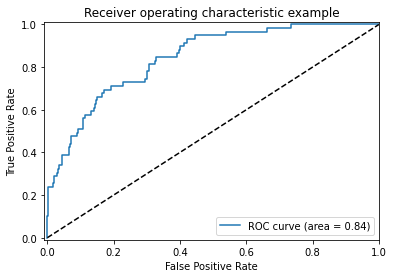

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
auc = roc_auc_score(y_test, y_hat)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 4. Improve the prediction performance of your model. Explain all steps.

Let's first try using SelectFromModel for feature selection

In [21]:
from sklearn.feature_selection import SelectFromModel

logreg = LogisticRegression(solver='liblinear', penalty='l1')

# First, we define feature selector using logistic regression
selector = SelectFromModel(logreg, threshold='1.25*median')

# Then, we fit selector to training data
selector.fit(X_train, y_train)

# Now, we transform training and test data to include only selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Finally, we fit logistic regression model on selected features
model2 = LogisticRegression(solver='liblinear', penalty='l1')
model2.fit(X_train_selected, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [22]:
y_hat2 = model2.predict(X_test_selected)
logreg_evaluation(y_hat2)

[[313   1]
 [ 51   8]]
Accuracy of the model is:  0.8605898123324397


This is a good improvement in the model accuracy. But let's do one more step and perform Lasso and Ridge regularization to see if the logistic regression can be further improved.

In [24]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# First, we define the pipeline with Lasso regularization
lasso_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('feature_selection', SelectFromModel(LogisticRegressionCV(penalty='l1', Cs=10, solver='liblinear', cv=5),threshold='1.25*median')),
    ('model', LogisticRegressionCV(penalty='l2', Cs=10, solver='liblinear', cv=5))
])

# Next, we define the pipeline with Ridge regularization
ridge_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('feature_selection', SelectFromModel(LogisticRegressionCV(penalty='l2', Cs=10, solver='liblinear', cv=5),threshold='1.25*median')),
    ('model', LogisticRegressionCV(penalty='l2', Cs=10, solver='liblinear', cv=5))
])

# We fit the pipelines on the training data and evaluate the models on the test date
lasso_pipeline.fit(X_train, y_train)
ridge_pipeline.fit(X_train, y_train)

lasso_score = lasso_pipeline.score(X_test, y_test)
ridge_score = ridge_pipeline.score(X_test, y_test)
#We also evaluate the the previous model we developed
logrig_score=model2.score(X_test_selected, y_test)

# print the scores
print("Lasso score: {:.3f}".format(lasso_score))
print("Ridge score: {:.3f}".format(ridge_score))
print("Logrig score: {:.3f}".format(logrig_score))


Lasso score: 0.863
Ridge score: 0.863
Logrig score: 0.861


In [25]:
lasso_y_hat = lasso_pipeline.predict(X_test)
logreg_evaluation(lasso_y_hat)

[[310   4]
 [ 47  12]]
Accuracy of the model is:  0.8632707774798928


Therefore, Lasso regularization gives us the best model.

In [26]:
# Let's retrieve the names and coefficients of the selected features
selected_features = X_train.columns[lasso_pipeline.named_steps['feature_selection'].get_support()]

# Get the coefficients of the logistic regression model from the pipeline's model object
coef = lasso_pipeline.named_steps['model'].coef_[0]

# Print the coefficients for each selected feature
print("Coefficients:")
for feature, coef in zip(selected_features, coef):
    print(f"{feature}: {coef:.3f}")

Coefficients:
timesignature_confidence: 0.234
loudness: 1.320
energy: -0.310
pitch: -0.668
timbre_0_min: 0.184
timbre_0_max: -1.367
timbre_1_min: 0.396
timbre_3_max: -0.367
timbre_4_min: 0.205
timbre_4_max: 0.231
timbre_5_min: -0.252
timbre_6_min: -0.369
timbre_11_min: -0.332
timbre_11_max: 0.270
